In [1]:
import urllib.request
import json
import os
from bs4 import BeautifulSoup
from jsonmerge import merge
import re


In [17]:
# CREATE SOUP
def soupify(url):

    # Open the request and create the soup
    response = urllib.request.urlopen(url)
    soup = BeautifulSoup(response.read(), "lxml")
    return soup


In [18]:
def get_speech_urls(url):
    # Get the urls and add the base URL to each in the list
    soup=soupify(url)
    try:
        urls = soup.findAll('a',href=re.compile('(documents)'))[3:]
        baseurl = 'https://www.presidency.ucsb.edu'
        urls = map(lambda x: baseurl + x['href'], list(urls))
        
        url_list=[]
        for url in urls:
            url_list.append(url)
        return url_list
    except:
        print("Failed trying again")
        return get_speech_urls(url)

In [38]:
candidate=soup.findAll('h3')[0].text
candidate

'John McCain'

In [40]:
speech=soup.findAll('h1')[0].text
speech

'Speech to GOPAC'

In [59]:
date=soup.find(property="dc:date").string
date

'November 16, 2006'

In [117]:
text=soup.find('div', attrs={'class': "field-docs-content"}).text.replace('\n','')
text

'Thank you for this opportunity to talk about the future of our Party and our country.The voters obviously wanted to get our attention last week. While I would have preferred a gentler reproach than the one they delivered, I\'m not discouraged nor should any of us be. Democrats had a good election night. We did not. But no defeat is permanent. And parties, just like individuals, show their character in adversity. Now, is the occasion to show ours.The election was not an affirmation of the other party\'s program. Try as hard as I could, I couldn\'t find much evidence that my Democratic friends were offering anything that resembled a coherent platform or principled leadership on the critical issues that confront us today.Nor do I believe Americans rejected our values and governing philosophy. On the contrary, I think they rejected us because they felt we had come to value our incumbency over our principles, and partisanship, from both parties, was no longer a contest of ideas, but an eve

In [19]:
def get_script(url):
    soup = soupify(url)
    candidate=soup.findAll('h3')[0].text
    speech=soup.findAll('h1')[0].text
    date=soup.find(property="dc:date").string
    text=soup.find('div', attrs={'class': "field-docs-content"}).text.replace('\n',' ').strip()
    
    return {"candidate": candidate, "speech title": speech, 'date':date, 'text':text}

In [194]:
get_script('https://www.presidency.ucsb.edu/documents/speech-gopac')

{'candidate': 'John McCain',
 'speech title': 'Speech to GOPAC',
 'date': 'November 16, 2006',
 'text': 'Thank you for this opportunity to talk about the future of our Party and our country. The voters obviously wanted to get our attention last week. While I would have preferred a gentler reproach than the one they delivered, I\'m not discouraged nor should any of us be. Democrats had a good election night. We did not. But no defeat is permanent. And parties, just like individuals, show their character in adversity. Now, is the occasion to show ours. The election was not an affirmation of the other party\'s program. Try as hard as I could, I couldn\'t find much evidence that my Democratic friends were offering anything that resembled a coherent platform or principled leadership on the critical issues that confront us today. Nor do I believe Americans rejected our values and governing philosophy. On the contrary, I think they rejected us because they felt we had come to value our incumb

In [20]:
def do_scrape(max_page_count):

    # Scrape the script from each URL and add to a list
    speeches = []
    
    # Stores number of pages scraped
    page_count = 0

    while page_count < max_page_count:

        print("\n \n ---------------PAGE COUNT: ", page_count)
        # Url of search page
        base_url1 = 'https://www.presidency.ucsb.edu/advanced-search?field-keywords=&field-keywords2=&field-keywords3=&from%5Bdate%5D=01-01-1995&to%5Bdate%5D=&person2=&category2%5B0%5D=&category2%5B1%5D=63&items_per_page=100'


        # Get the speeches list from the main page
        urls=get_speech_urls(base_url1 + "&page=" + str(page_count))

        for url in urls:
            print(url)
            speeches.append(get_script(url))
            
        page_count+=1

    
    # Write the output to a file

    try:
        with open("Speeches1.json", 'w') as json_file:
            json.dump(speeches, json_file, indent=4)
        return 'Speech document created.'
    except:
        return 'Could not create episode document.'

In [21]:
do_scrape(20)


 
 ---------------PAGE COUNT:  0
https://www.presidency.ucsb.edu/documents/remarks-announcing-candidacy-for-the-republican-presidential-nomination-0
https://www.presidency.ucsb.edu/documents/remarks-los-angeles-hollywood-speech
https://www.presidency.ucsb.edu/documents/remarks-the-united-states-conference-mayors-miami
https://www.presidency.ucsb.edu/documents/remarks-the-iowa-straw-poll-ames
https://www.presidency.ucsb.edu/documents/remarks-the-american-legion-convention-indianapolis
https://www.presidency.ucsb.edu/documents/remarks-the-econmoic-club-chicago
https://www.presidency.ucsb.edu/documents/excerpt-remarks-concord-new-hampshire
https://www.presidency.ucsb.edu/documents/remarks-family-forum-event-iowa
https://www.presidency.ucsb.edu/documents/interview-who-radio
https://www.presidency.ucsb.edu/documents/excerpts-remarks-following-the-iowa-caucuses
https://www.presidency.ucsb.edu/documents/remarks-the-hudson-new-hampshire-chamber-commerce
https://www.presidency.ucsb.edu/documen

https://www.presidency.ucsb.edu/documents/remarks-new-york-city-0

 
 ---------------PAGE COUNT:  1
https://www.presidency.ucsb.edu/documents/remarks-the-american-federation-teachers-0
https://www.presidency.ucsb.edu/documents/remarks-the-democratic-leadership-conference-national-conversation
https://www.presidency.ucsb.edu/documents/remarks-announcing-selection-dick-cheney-vice-presidential-running-mate
https://www.presidency.ucsb.edu/documents/remarks-announcing-selection-joe-lieberman-vice-presidential-running-mate
https://www.presidency.ucsb.edu/documents/telephone-remarks-the-international-union-electronic-electrical-salaried-machine-and
https://www.presidency.ucsb.edu/documents/remarks-chevy-chase-maryland
https://www.presidency.ucsb.edu/documents/remarks-muskegon-michigan
https://www.presidency.ucsb.edu/documents/remarks-kissimmee-florida
https://www.presidency.ucsb.edu/documents/address-conceding-the-2000-presidential-election
https://www.presidency.ucsb.edu/documents/address-a

https://www.presidency.ucsb.edu/documents/remarks-orlando-florida-4
https://www.presidency.ucsb.edu/documents/remarks-east-mt-zion-baptist-church-cleveland-ohio
https://www.presidency.ucsb.edu/documents/remarks-santa-fe-new-mexico
https://www.presidency.ucsb.edu/documents/remarks-the-national-conference-the-american-association-retired-people-las-vegas
https://www.presidency.ucsb.edu/documents/remarks-milwaukee-area-technical-college
https://www.presidency.ucsb.edu/documents/radio-address-the-nation-6
https://www.presidency.ucsb.edu/documents/remarks-xenia-high-school-xenia-ohio
https://www.presidency.ucsb.edu/documents/remarks-teresa-heinz-kerry-the-lion-judah-conference-washington-dc
https://www.presidency.ucsb.edu/documents/remarks-tampa-florida-7
https://www.presidency.ucsb.edu/documents/remarks-wilkes-barre-pennsylvania-1
https://www.presidency.ucsb.edu/documents/remarks-waterloo-iowa-0
https://www.presidency.ucsb.edu/documents/remarks-columbus-ohio-9

 
 ---------------PAGE COUNT

https://www.presidency.ucsb.edu/documents/remarks-the-detroit-economic-club-0
https://www.presidency.ucsb.edu/documents/remarks-the-massachusetts-citizens-for-life-mothers-day-pioneer-valley-dinner
https://www.presidency.ucsb.edu/documents/excerpts-governor-mitt-romneys-commencement-address-hillsdale-college
https://www.presidency.ucsb.edu/documents/interview-with-tim-russert-nbc-news-meet-the-press-3
https://www.presidency.ucsb.edu/documents/remarks-the-death-jerry-falwell-columbia-south-carolina
https://www.presidency.ucsb.edu/documents/speech-new-america-foundation
https://www.presidency.ucsb.edu/documents/excerpts-remarks-orlando-florida
https://www.presidency.ucsb.edu/documents/remarks-southern-new-hampshire-university-commencement
https://www.presidency.ucsb.edu/documents/speech-dillard-university-new-orleans
https://www.presidency.ucsb.edu/documents/remarks-miami-expanding-pre-k
https://www.presidency.ucsb.edu/documents/address-the-oklahoma-state-legislature
https://www.presiden

https://www.presidency.ucsb.edu/documents/remarks-washington-dc-tax-fairness-for-the-middle-class
https://www.presidency.ucsb.edu/documents/excerpts-remarks-reporters-london-england
https://www.presidency.ucsb.edu/documents/address-the-national-rifle-association
https://www.presidency.ucsb.edu/documents/remarks-the-mackinac-republican-leadership-conference
https://www.presidency.ucsb.edu/documents/address-the-mackinac-republican-leadership-conference
https://www.presidency.ucsb.edu/documents/address-the-hudson-institute-washington-dc
https://www.presidency.ucsb.edu/documents/remarks-the-howard-university-convocation-washington-dc
https://www.presidency.ucsb.edu/documents/address-the-2007-hispanic-business-expo-orlando-florida
https://www.presidency.ucsb.edu/documents/remarks-the-national-rifle-associations-celebration-american-values-conference-washington
https://www.presidency.ucsb.edu/documents/remarks-chicago-new-beginning
https://www.presidency.ucsb.edu/documents/remarks-the-carneg

https://www.presidency.ucsb.edu/documents/interview-with-tim-russert-nbc-news-meet-the-press-1
https://www.presidency.ucsb.edu/documents/remarks-the-center-for-hydrogen-research-aiken-county-south-carolina
https://www.presidency.ucsb.edu/documents/excerpt-remarks-reporters-san-francisco-california
https://www.presidency.ucsb.edu/documents/speech-education-and-jobs-america
https://www.presidency.ucsb.edu/documents/remarks-tampa-florida-3
https://www.presidency.ucsb.edu/documents/remarks-the-every-county-counts-kickoff-council-bluffs-iowa
https://www.presidency.ucsb.edu/documents/excerpts-remarks-ames-iowa
https://www.presidency.ucsb.edu/documents/interview-with-tim-russert-nbc-news-meet-the-press-7
https://www.presidency.ucsb.edu/documents/remarks-the-the-hillary-i-know-event-johnston-iowa
https://www.presidency.ucsb.edu/documents/speech-new-vision-foreign-and-domestic
https://www.presidency.ucsb.edu/documents/remarks-the-foreign-policy-forum-des-moines-iowa
https://www.presidency.ucsb.

https://www.presidency.ucsb.edu/documents/remarks-the-virginia-jefferson-jackson-dinner-0
https://www.presidency.ucsb.edu/documents/remarks-the-conservative-political-action-conference-3
https://www.presidency.ucsb.edu/documents/remarks-following-the-maryland-virginia-and-district-columbia-primaries
https://www.presidency.ucsb.edu/documents/remarks-following-the-maryland-virginia-and-district-columbia-primaries-0
https://www.presidency.ucsb.edu/documents/remarks-following-the-maryland-virginia-and-district-columbia-primaries-1
https://www.presidency.ucsb.edu/documents/remarks-following-the-maryland-virginia-and-district-columbia-primaries-2
https://www.presidency.ucsb.edu/documents/remarks-janesville-wisconsin-keeping-americas-promise
https://www.presidency.ucsb.edu/documents/remarks-town-hall-with-general-motors-employees-warren-ohio
https://www.presidency.ucsb.edu/documents/remarks-the-wisconsin-founders-day-gala-milwaukee
https://www.presidency.ucsb.edu/documents/interview-with-geor

https://www.presidency.ucsb.edu/documents/interview-with-tim-russert-nbc-news-meet-the-press-10
https://www.presidency.ucsb.edu/documents/interview-with-katie-couric-cbs-news-3
https://www.presidency.ucsb.edu/documents/interview-with-katie-couric-cbs-news-4
https://www.presidency.ucsb.edu/documents/interview-with-john-roberts-cnns-american-morning-0
https://www.presidency.ucsb.edu/documents/remarks-following-the-indiana-and-north-carolina-primaries
https://www.presidency.ucsb.edu/documents/remarks-following-the-indiana-and-north-carolina-primaries-0
https://www.presidency.ucsb.edu/documents/remarks-judicial-philosophy-wake-forest-university-winston-salem-north-carolina
https://www.presidency.ucsb.edu/documents/remarks-john-mccain-his-vision-for-defending-the-freedom-and-dignity-the-worlds-vulnerable
https://www.presidency.ucsb.edu/documents/interview-with-wolf-blitzer-cnns-the-situation-room-0
https://www.presidency.ucsb.edu/documents/remarks-economic-discussion-beaverton-oregon
https:

https://www.presidency.ucsb.edu/documents/remarks-the-clinton-obama-breakfast-fundraiser-new-york-city
https://www.presidency.ucsb.edu/documents/remarks-the-womens-economic-security-town-hall-fairfax-virginia
https://www.presidency.ucsb.edu/documents/remarks-dayton-ohio-5
https://www.presidency.ucsb.edu/documents/senator-mccains-weekly-radio-address-5
https://www.presidency.ucsb.edu/documents/remarks-the-2008-national-council-la-raza-annual-meeting-san-diego-california-0
https://www.presidency.ucsb.edu/documents/remarks-via-satellite-the-80th-convention-the-american-federation-teachers
https://www.presidency.ucsb.edu/documents/interview-with-fareed-zakaria-cnns-global-public-square
https://www.presidency.ucsb.edu/documents/remarks-the-99th-annual-convention-the-naacp-cincinnati-ohio-0
https://www.presidency.ucsb.edu/documents/remarks-the-2008-national-council-la-raza-annual-meeting-san-diego-california
https://www.presidency.ucsb.edu/documents/remarks-washington-dc
https://www.presiden

https://www.presidency.ucsb.edu/documents/remarks-the-congressional-hispanic-caucus-institute-gala-washington-dc
https://www.presidency.ucsb.edu/documents/interview-with-charlie-gibson-abc-news-part-1-3
https://www.presidency.ucsb.edu/documents/remarks-dover-new-hampshire
https://www.presidency.ucsb.edu/documents/senator-mccains-weekly-radio-address-1
https://www.presidency.ucsb.edu/documents/remarks-saint-clair-shores-michigan
https://www.presidency.ucsb.edu/documents/interview-with-peter-cook-bloombergs-money-and-politics
https://www.presidency.ucsb.edu/documents/remarks-tampa-florida-5
https://www.presidency.ucsb.edu/documents/interview-with-john-roberts-cnns-american-morning
https://www.presidency.ucsb.edu/documents/remarks-golden-colorado
https://www.presidency.ucsb.edu/documents/interview-with-kiran-chetry-cnns-american-morning
https://www.presidency.ucsb.edu/documents/interview-with-sean-hannity-fox-news-part-1-2
https://www.presidency.ucsb.edu/documents/remarks-the-general-moto

https://www.presidency.ucsb.edu/documents/excerpts-remarks-fredericksburg-virginia
https://www.presidency.ucsb.edu/documents/interview-with-piper-palin-sean-hannity-fox-news-hannity-colmes
https://www.presidency.ucsb.edu/documents/remarks-dayton-ohio-3
https://www.presidency.ucsb.edu/documents/remarks-canton-ohio-presenting-presidential-campaign-closing-argument
https://www.presidency.ucsb.edu/documents/remarks-after-holding-meeting-the-state-the-economy-cleveland-ohio
https://www.presidency.ucsb.edu/documents/remarks-hershey-pennsylvania-1
https://www.presidency.ucsb.edu/documents/interview-with-cindy-mccain-sean-hannity-fox-news-hannity-colmes
https://www.presidency.ucsb.edu/documents/remarks-chester-pennsylvania
https://www.presidency.ucsb.edu/documents/remarks-miami-florida-2
https://www.presidency.ucsb.edu/documents/remarks-toledo-ohio-0
https://www.presidency.ucsb.edu/documents/remarks-raleigh-north-carolina
https://www.presidency.ucsb.edu/documents/interview-with-larry-king-cnn


https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-fundraiser-4
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-fundraiser-3
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-fundraiser-new-york-city-1
https://www.presidency.ucsb.edu/documents/remarks-announcing-candidacy-for-president-charleston-south-carolina
https://www.presidency.ucsb.edu/documents/remarks-the-112th-veterans-foreign-wars-national-convention-san-antonio-texas
https://www.presidency.ucsb.edu/documents/remarks-republican-national-hispanic-assembly-tampa-florida
https://www.presidency.ucsb.edu/documents/remarks-response-president-obamas-address-joint-address-congress
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-fundraiser-0
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-fundraiser-1
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-f

https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-1
https://www.presidency.ucsb.edu/documents/remarks-tampa-following-the-florida-primary
https://www.presidency.ucsb.edu/documents/remarks-orlando-following-the-florida-primary
https://www.presidency.ucsb.edu/documents/remarks-henderson-nevada-following-the-florida-primary
https://www.presidency.ucsb.edu/documents/remarks-las-vegas-nevada-following-the-florida-primary
https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-0
https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-chevy-chase-maryland
https://www.presidency.ucsb.edu/documents/remarks-colorado-following-the-nevada-caucuses
https://www.presidency.ucsb.edu/documents/remarks-arden-hills-minnesota-following-the-nevada-caucuses
https://www.presidency.ucsb.edu/documents/remarks-las-vegas-following-the-nevada-caucuses
https://www.presidency.ucsb.edu/documents/press-conference-las-vegas-fo

https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-richmond-virginia
https://www.presidency.ucsb.edu/documents/remarks-lansing-michigan-new-course-for-america
https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-seattle-washington
https://www.presidency.ucsb.edu/documents/remarks-obama-victory-2012-fundraiser-seattle
https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-studio-city-california
https://www.presidency.ucsb.edu/documents/commencement-address-liberty-university-lynchburg-virginia
https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-new-york-city-18
https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-new-york-city-19
https://www.presidency.ucsb.edu/documents/remarks-des-moines-iowa-6
https://www.presidency.ucsb.edu/documents/remarks-fundraising-event-boca-raton-florida
https://www.presidency.ucsb.edu/documents/video

https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-chicago-4
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-chicago-illinois
https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-chicago-3
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-council-bluffs-iowa
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-boone-iowa
https://www.presidency.ucsb.edu/documents/remarks-chillicothe-ohio-2
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-oskaloosa-iowa
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-marshalltown-iowa-0
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-waterloo-iowa
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-dubuque-iowa-0
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-davenport-iowa-0
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-windham-new-hampshire
https

https://www.presidency.ucsb.edu/documents/remarks-campaign-event-newport-news-virginia
https://www.presidency.ucsb.edu/documents/remarks-obama-victory-fund-2012-fundraiser-san-francisco-california-0
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-san-francisco
https://www.presidency.ucsb.edu/documents/remarks-campaign-event-van-meter-iowa
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-columbus-ohio-1
https://www.presidency.ucsb.edu/documents/remarks-with-senator-rob-portman-and-governor-chris-christie-campaign-event-cuyahoga-falls
https://www.presidency.ucsb.edu/documents/remarks-campaign-event-mount-vernon-ohio
https://www.presidency.ucsb.edu/documents/remarks-with-new-jersey-governor-chris-christie-campaign-event-delaware-ohio
https://www.presidency.ucsb.edu/documents/remarks-campaign-event-sidney-ohio
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-miami-florida
https://www.presidency.ucsb.edu/documents/remarks-campaign-event-ashev

https://www.presidency.ucsb.edu/documents/remarks-democratic-senatorial-campaign-committee-lunch-denver-colorado
https://www.presidency.ucsb.edu/documents/remarks-democratic-congressional-campaign-committee-dinner-dallas-texas
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-fundraiser-austin-texas-2
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-fundraiser-seattle-washington-0
https://www.presidency.ucsb.edu/documents/remarks-democratic-congressional-campaign-committee-luncheon-los-altos-hills-california
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-fundraiser-los-angeles-california-4
https://www.presidency.ucsb.edu/documents/remarks-democratic-senatorial-campaign-committee-fundraiser-tisbury-massachusetts
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-fundraiser-purchase-new-york
https://www.presidency.ucsb.edu/documents/remarks-democratic-congressional-c

https://www.presidency.ucsb.edu/documents/remarks-the-st-pauls-school-advanced-studies-program-concord-new-hampshire
https://www.presidency.ucsb.edu/documents/excerpt-remarks-ames-iowa
https://www.presidency.ucsb.edu/documents/remarks-new-york-city-reforming-wall-street
https://www.presidency.ucsb.edu/documents/remarks-the-national-urban-league-conference-fort-lauderdale-florida-0
https://www.presidency.ucsb.edu/documents/remarks-with-joseph-stiglitz-james-galbraith-and-stephanie-kelton-discussion-the-greek
https://www.presidency.ucsb.edu/documents/remarks-the-national-urban-league-conference-fort-lauderdale-florida
https://www.presidency.ucsb.edu/documents/remarks-the-redstate-gathering-atlanta-georgia

 
 ---------------PAGE COUNT:  15
https://www.presidency.ucsb.edu/documents/remarks-national-nurses-united-endorsement-oakland-california
https://www.presidency.ucsb.edu/documents/remarks-the-ronald-reagan-presidential-library-simi-valley-california
https://www.presidency.ucsb.edu/docu

https://www.presidency.ucsb.edu/documents/interview-with-john-dickerson-cbs-news-face-the-nation-1
https://www.presidency.ucsb.edu/documents/interview-with-chuck-todd-nbc-news-meet-the-press-2
https://www.presidency.ucsb.edu/documents/interview-with-jake-tapper-cnns-state-the-union-0
https://www.presidency.ucsb.edu/documents/interview-with-rachel-maddow-msnbc
https://www.presidency.ucsb.edu/documents/remarks-concord-following-the-new-hampshire-primary
https://www.presidency.ucsb.edu/documents/remarks-democratic-national-committee-reception-atherton-california
https://www.presidency.ucsb.edu/documents/remarks-democratic-hope-fund-reception-los-angeles-california
https://www.presidency.ucsb.edu/documents/remarks-democratic-hope-fund-dinner-los-angeles-california
https://www.presidency.ucsb.edu/documents/interview-with-chris-wallace-fox-news-sunday-2
https://www.presidency.ucsb.edu/documents/remarks-campaign-rally-for-jeb-bush-charleston-south-carolina
https://www.presidency.ucsb.edu/docu

https://www.presidency.ucsb.edu/documents/remarks-the-mississippi-coliseum-jackson-mississippi
https://www.presidency.ucsb.edu/documents/remarks-the-xfinity-arena-everett-washington
https://www.presidency.ucsb.edu/documents/remarks-immigration-the-phoenix-convention-center-phoenix-arizona
https://www.presidency.ucsb.edu/documents/remarks-the-american-legion-cincinnati-ohio
https://www.presidency.ucsb.edu/documents/remarks-the-roberts-centre-wilmington-ohio
https://www.presidency.ucsb.edu/documents/remarks-great-faith-international-ministries-detroit-michigan
https://www.presidency.ucsb.edu/documents/remarks-rally-the-greenville-convention-center-greenville-north-carolina
https://www.presidency.ucsb.edu/documents/remarks-the-union-league-philadelphia-philadelphia-pennsylvania
https://www.presidency.ucsb.edu/documents/remarks-the-cleveland-arts-and-social-sciences-academy-cleveland-ohio
https://www.presidency.ucsb.edu/documents/remarks-the-11th-annual-values-voter-summit-washington-dc-om

https://www.presidency.ucsb.edu/documents/remarks-smale-riverfront-park-cincinnati-ohio
https://www.presidency.ucsb.edu/documents/remarks-the-kent-state-student-recreation-center-kent-ohio
https://www.presidency.ucsb.edu/documents/remarks-macomb-community-college-south-campus-warren-michigan
https://www.presidency.ucsb.edu/documents/remarks-obamacare-valley-forge-pennsylvania
https://www.presidency.ucsb.edu/documents/remarks-the-central-florida-fairgrounds-orlando-florida
https://www.presidency.ucsb.edu/documents/remarks-the-bayfront-park-amphitheater-miami-florida
https://www.presidency.ucsb.edu/documents/remarks-pasco-hernando-state-college-east-campus-dade-city-florida
https://www.presidency.ucsb.edu/documents/remarks-coastal-credit-union-music-park-raleigh-north-carolina
https://www.presidency.ucsb.edu/documents/remarks-pitt-community-college-winterville-north-carolina
https://www.presidency.ucsb.edu/documents/remarks-eastern-market-detroit-michigan
https://www.presidency.ucsb.edu/

'Speech document created.'

In [2]:
import pandas as pd
import numpy as np
from spacy import displacy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [3]:
# Load the JSON file into a data frame
df = pd.read_json("Speeches1.json", orient='columns')

In [27]:
df.head()

,candidate,date,speech title,text
0,Robert Dole,1995-04-10,Remarks Announcing Candidacy for the Republica...,"Thank you, Governor Graves, Senator Kassebaum...."
1,Robert Dole,1995-05-31,"Remarks in Los Angeles: ""Hollywood Speech""",I want to talk about a specific matter tonight...
2,Robert Dole,1995-06-17,Remarks to the United States Conference of May...,"Thank you, Senator Kempthorne, and thank you a..."
3,Robert Dole,1995-08-19,Remarks at the Iowa Straw Poll in Ames,"Thank you, Dan Quayle , for that great introdu..."
4,Robert Dole,1995-09-04,Remarks at the American Legion Convention in I...,"Thank you, and thank you very much, Commander ..."


In [4]:
df.shape

(1768, 4)

Text(0.5,1,'Missing Data')

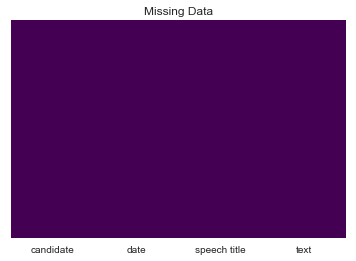

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing Data')

In [6]:
len(df.candidate.unique())

48

In [33]:
df.candidate.unique()

array(['Robert Dole', 'George Bush', 'Jack Kemp', 'William J. Clinton',
       'George W. Bush', 'Albert Gore, Jr.', 'John McCain',
       'John Edwards', 'John F. Kerry', 'Barack Obama', 'Bill Richardson',
       'Hillary Clinton', 'Mitt Romney', 'Joe Biden', 'Mike Huckabee',
       'Christopher Dodd', 'Rudy Giuliani', 'Fred Thompson', 'Ron Paul',
       'Sarah Palin', 'Joseph Lieberman', 'Newt Gingrich', 'Herman Cain',
       'Tim Pawlenty', 'Rick Santorum', 'Jon Huntsman',
       'Michele Bachmann', 'Rick Perry', 'Paul Ryan', 'Ted Cruz',
       'Rand Paul', 'Marco Rubio', 'Bernie Sanders', 'Ben Carson',
       'Carly Fiorina', 'George Pataki', "Martin O'Malley",
       'Lindsey Graham', 'Lincoln Chafee', 'Jeb Bush', 'Donald J. Trump',
       'Bobby Jindal', 'Chris Christie', 'Scott Walker', 'Jim Webb',
       'John Kasich', 'Mike Pence', 'Tim Kaine'], dtype=object)

In [43]:
# create a won primary column
df['won_nomination']=np.where((df.candidate=='Robert Dole')|(df.candidate=='George Bush')|
                              (df.candidate=='William J. Clinton')|(df.candidate=='George W. Bush')|(df.candidate=='Albert Gore, Jr.')|
                              (df.candidate=='John McCain')|(df.candidate=='John F. Kerry')|(df.candidate=='Barack Obama')|
                              (df.candidate=='Hillary Clinton')|(df.candidate=='Mitt Romney')|(df.candidate=='Donald J. Trump'),1,0)
                              
                              
                              
                              

In [7]:
# create a political party column
df['party']=np.where((df.candidate=='Tim Kaine')|(df.candidate=='Joseph Lieberman')|(df.candidate=='John F. Kerry')|(df.candidate=='Albert Gore, Jr.')|(df.candidate=='William J. Clinton')|(df.candidate=='Hillary Clinton')|(df.candidate=='Bill Richardson')|(df.candidate=='Barack Obama')|(df.candidate=='John Edwards')|(df.candidate=='Christopher Dodd')|(df.candidate=='Joe Biden')|(df.candidate=='Bernie Sanders')|(df.candidate=="Martin O'Malley")|(df.candidate=="Lincoln Chafee")|(df.candidate=="Jim Webb"),'Democrat','Republican')


In [8]:
df[(df.candidate=="Martin O'Malley")].head()

,candidate,date,speech title,text,party
1465,Martin O'Malley,2015-05-30,Remarks Announcing Candidacy for President in ...,My fellow Americans. I want to talk with you t...,Democrat
1478,Martin O'Malley,2015-06-21,Remarks at the United States Conference of May...,It is so good to be back here among great frie...,Democrat
1480,Martin O'Malley,2015-06-25,Remarks at the TruCon15 Conference in Washingt...,I. Introduction Thank you for having me here t...,Democrat
1487,Martin O'Malley,2015-07-13,Remarks at the National Council of La Raza Con...,It is such a pleasure to be here with you. Tha...,Democrat
1489,Martin O'Malley,2015-07-17,Remarks at the Iowa Democratic Party Hall of F...,"My name is Martin O'Malley, I am running for P...",Democrat


In [9]:
#1996 campaign
campaign_1996=df[(df['date'] > '1995-01-01') & (df['date'] < '1997-12-01')]
campaign_1996.head()

,candidate,date,speech title,text,party
0,Robert Dole,1995-04-10,Remarks Announcing Candidacy for the Republica...,"Thank you, Governor Graves, Senator Kassebaum....",Republican
1,Robert Dole,1995-05-31,"Remarks in Los Angeles: ""Hollywood Speech""",I want to talk about a specific matter tonight...,Republican
2,Robert Dole,1995-06-17,Remarks to the United States Conference of May...,"Thank you, Senator Kempthorne, and thank you a...",Republican
3,Robert Dole,1995-08-19,Remarks at the Iowa Straw Poll in Ames,"Thank you, Dan Quayle , for that great introdu...",Republican
4,Robert Dole,1995-09-04,Remarks at the American Legion Convention in I...,"Thank you, and thank you very much, Commander ...",Republican


In [11]:
# create a won primary column
campaign_1996['won_nomination'] = np.where((campaign_1996.candidate == 'Robert Dole') |
                                           (campaign_1996.candidate == 'William J. Clinton'), 1, 0)

/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
# 2000 campaign
campaign_2000 = df[(df['date'] > '1999-01-01') & (df['date'] < '2001-12-01')]

campaign_2000.head()

,candidate,date,speech title,text,party
87,George W. Bush,1999-06-12,Remarks Announcing Candidacy for the Republica...,"What a pleasure it is to visit with you, to sh...",Republican
88,"Albert Gore, Jr.",1999-06-16,Remarks Announcing Candidacy for the Democrati...,"To my beloved family, to Tipper, to the people...",Democrat
89,"Albert Gore, Jr.",2000-01-07,Remarks at Ebenezer Baptist Church in Atlanta,It is humbling to return to the Ebenezer Bapti...,Democrat
90,George W. Bush,2000-03-06,Remarks at the Simon Wiesenthal Center in Los ...,"It is a special honor to be with you today, an...",Republican
91,George W. Bush,2000-03-07,"Remarks in Austin Following the ""Super Tuesday...","Phyllis, thank you. Thank you for your dedicat...",Republican


In [27]:
# create a won primary column
campaign_2000['won_nomination']=np.where((campaign_2000.candidate == 'George W. Bush')|(campaign_2000.candidate == 'Albert Gore, Jr.'),1,0)

/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
# 2004 campaign
campaign_2004=df[(df['date'] > '2003-01-01') & (df['date'] < '2005-12-01')]
campaign_2004.head()

,candidate,date,speech title,text,party
111,John F. Kerry,2003-09-02,Address Announcing Candidacy for President of ...,"Thank you, Max Cleland for your friendship, yo...",Democrat
112,John Edwards,2003-09-16,Address Announcing Candidacy for President of ...,"Good morning. Welcome to my hometown, Robbins,...",Democrat
113,John F. Kerry,2004-03-02,Address to the Greater Bethlehem Temple Church...,Good morning and thank you for inviting me int...,Democrat
114,John F. Kerry,2004-03-08,"Remarks in Des Moines, Iowa",We are here tonight to honor our next generati...,Democrat
115,John F. Kerry,2004-03-09,"Remarks Following the Florida, Louisiana, Miss...","Today, from Florida to Mississippi, to Louisia...",Democrat


In [28]:
# create a won primary column
campaign_2004['won_nomination']=np.where((campaign_2004.candidate == 'George W. Bush')|(campaign_2004.candidate == 'John F. Kerry'),1,0)

/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
# 2008 campaign
campaign_2008=df[(df['date'] > '2006-01-01') & (df['date'] < '2009-12-01')]
campaign_2008.head()

,candidate,date,speech title,text,party
209,John McCain,2006-11-16,Speech to GOPAC,Thank you for this opportunity to talk about t...,Republican
210,John McCain,2006-11-16,Speech to the Federalist Society,"Thank you, Ted, for that kind introduction. I ...",Republican
211,Bill Richardson,2006-12-16,Iraq Speech to New Hampshire Democratic State ...,Thank you Kathy. You are a great State Chair. ...,Democrat
212,Hillary Clinton,2007-01-20,Video Transcript: Presidential Exploratory Com...,HILLARY CLINTON: I announced today that I am f...,Democrat
213,Hillary Clinton,2007-01-22,"Remarks in a ""Let the Conversation Begin Webcast""","SENATOR CLINTON: Hi, everyone, and welcome to ...",Democrat


In [31]:
# create a won primary column
campaign_2008['won_nomination']=np.where((campaign_2008.candidate == 'John McCain')|(campaign_2008.candidate == 'Barack Obama'),1,0)

/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [33]:
# 2012 campaign

campaign_2012=df[(df['date'] > '2011-05-01') & (df['date'] < '2012-12-01')]
campaign_2012.head()

,candidate,date,speech title,text,party
956,Barack Obama,2011-05-10,Remarks at a Democratic National Committee Fun...,"The President. Hello, Austin! Thank you. Thank...",Democrat
957,Barack Obama,2011-05-10,Remarks at a Democratic National Committee Fun...,"Let me, first of all--I'd like to hire Alexa a...",Democrat
958,Newt Gingrich,2011-05-11,Video Remarks Announcing Candidacy for President,I'm Newt Gingrich and I'm announcing my candid...,Republican
959,Ron Paul,2011-05-13,Remarks Announcing Candidacy for President in ...,"Thank you very much, thank you, thank you. Tha...",Republican
960,Barack Obama,2011-05-16,Remarks at a Democratic National Committee Fun...,"Thank you, everybody. Thank you. Well, it is w...",Democrat


In [34]:
# create a won primary column
campaign_2012['won_nomination']=np.where((campaign_2012.candidate == 'Barack Obama')|(campaign_2012.candidate == 'Mitt Romney'),1,0)

/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [36]:
# 2016 campaign
campaign_2016=df[(df['date'] > '2015-01-01') & (df['date'] < '2016-12-01')]
campaign_2016

,candidate,date,speech title,text,party
1433,Barack Obama,2015-02-13,Remarks at Democratic National Committee Fundr...,"Thank you, everybody. Well, first of all, let ...",Democrat
1434,Ted Cruz,2015-03-23,Remarks Announcing Candidacy for President at ...,Good to see you. [applause] Thank you. [applau...,Republican
1435,Rand Paul,2015-04-07,Remarks Announcing Candidacy for President in ...,"I have a message, a message that is loud and c...",Republican
1436,Hillary Clinton,2015-04-12,Video Remarks Announcing Candidacy for President,Unidentified Female: I'm getting ready for a l...,Democrat
1437,Marco Rubio,2015-04-13,Remarks Announcing Candidacy for President in ...,Thank you. After months of deliberation and pr...,Republican
1438,Marco Rubio,2015-04-14,Interview with Jake Tapper of CNN,"Tapper: And here now, newly declared Republica...",Republican
1439,Hillary Clinton,2015-04-14,Remarks in a Question and Answer Session at Ki...,[joined in progress] [unknown student speaker]...,Democrat
1440,Marco Rubio,2015-04-17,Remarks at the First in the Nation Republican ...,Rubio: Thank you. It's an honor to be here. Th...,Republican
1441,Rand Paul,2015-04-18,Remarks at the First in the Nation Republican ...,[joined in progress] Paul: ...sometimes people...,Republican
1442,Ted Cruz,2015-04-18,Remarks at the First in the Nation Republican ...,"Cruz: Thank you. Good to see you. Well, God bl...",Republican


In [37]:
# create a won primary column
campaign_2016['won_nomination']=np.where((campaign_2016.candidate == 'Hillary Clinton')|(campaign_2016.candidate == 'Donald J. Trump'),1,0)

/anaconda3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
campaign_speeches=pd.concat([campaign_1996,campaign_2000,campaign_2004,campaign_2008,campaign_2012,campaign_2016],axis=0)
campaign_speeches.shape

(1692, 6)

In [42]:
campaign_speeches.head()

,candidate,date,speech title,text,party,won_nomination
0,Robert Dole,1995-04-10,Remarks Announcing Candidacy for the Republica...,"Thank you, Governor Graves, Senator Kassebaum....",Republican,1
1,Robert Dole,1995-05-31,"Remarks in Los Angeles: ""Hollywood Speech""",I want to talk about a specific matter tonight...,Republican,1
2,Robert Dole,1995-06-17,Remarks to the United States Conference of May...,"Thank you, Senator Kempthorne, and thank you a...",Republican,1
3,Robert Dole,1995-08-19,Remarks at the Iowa Straw Poll in Ames,"Thank you, Dan Quayle , for that great introdu...",Republican,1
4,Robert Dole,1995-09-04,Remarks at the American Legion Convention in I...,"Thank you, and thank you very much, Commander ...",Republican,1


In [52]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [53]:
sid=SentimentIntensityAnalyzer()

In [54]:
campaign_speeches['sentiment_score']=campaign_speeches.text.apply(lambda text:sid.polarity_scores(text))

In [70]:
campaign_speeches['positive']=campaign_speeches['sentiment_score'].apply(lambda d:d['pos'])

In [79]:
campaign_speeches['negative']=campaign_speeches['sentiment_score'].apply(lambda d:d['neg'])

In [80]:
campaign_speeches

,candidate,date,speech title,text,party,won_nomination,sentiment_score,positive,negative
0,Robert Dole,1995-04-10,Remarks Announcing Candidacy for the Republica...,"Thank you, Governor Graves, Senator Kassebaum....",Republican,1,"{'neg': 0.088, 'neu': 0.736, 'pos': 0.175, 'co...",0.175,0.088
1,Robert Dole,1995-05-31,"Remarks in Los Angeles: ""Hollywood Speech""",I want to talk about a specific matter tonight...,Republican,1,"{'neg': 0.143, 'neu': 0.657, 'pos': 0.2, 'comp...",0.200,0.143
2,Robert Dole,1995-06-17,Remarks to the United States Conference of May...,"Thank you, Senator Kempthorne, and thank you a...",Republican,1,"{'neg': 0.12, 'neu': 0.711, 'pos': 0.17, 'comp...",0.170,0.120
3,Robert Dole,1995-08-19,Remarks at the Iowa Straw Poll in Ames,"Thank you, Dan Quayle , for that great introdu...",Republican,1,"{'neg': 0.103, 'neu': 0.717, 'pos': 0.181, 'co...",0.181,0.103
4,Robert Dole,1995-09-04,Remarks at the American Legion Convention in I...,"Thank you, and thank you very much, Commander ...",Republican,1,"{'neg': 0.103, 'neu': 0.725, 'pos': 0.172, 'co...",0.172,0.103
5,Robert Dole,1995-09-05,Remarks to the Econmoic Club of Chicago,Thank you very much. It's an honor to speak be...,Republican,1,"{'neg': 0.082, 'neu': 0.747, 'pos': 0.171, 'co...",0.171,0.082
6,Robert Dole,1996-01-27,"Excerpt of Remarks in Concord, New Hampshire","""The next presidential election will offer Ame...",Republican,1,"{'neg': 0.061, 'neu': 0.78, 'pos': 0.159, 'com...",0.159,0.061
7,Robert Dole,1996-02-03,Remarks at a Family Forum Event in Iowa,The first acts of every President define his a...,Republican,1,"{'neg': 0.06, 'neu': 0.825, 'pos': 0.114, 'com...",0.114,0.060
8,Robert Dole,1996-02-12,Interview on WHO Radio,MICKELSON: Big day. This is the focal point of...,Republican,1,"{'neg': 0.034, 'neu': 0.827, 'pos': 0.139, 'co...",0.139,0.034
9,Robert Dole,1996-02-12,Excerpts of Remarks Following the Iowa Caucuses,Thank you Iowa! A lot of people have had this ...,Republican,1,"{'neg': 0.019, 'neu': 0.767, 'pos': 0.214, 'co...",0.214,0.019


In [90]:
campaign_speeches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1692 entries, 0 to 1755
Data columns (total 9 columns):
candidate          1692 non-null object
date               1692 non-null datetime64[ns]
speech title       1692 non-null object
text               1692 non-null object
party              1692 non-null object
won_nomination     1692 non-null int64
sentiment_score    1692 non-null object
positive           1692 non-null float64
negative           1692 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 132.2+ KB


In [92]:
campaign_speeches.to_csv('Campaign Speeches', index=False)